In [127]:
!pip install tweepy

Paquetes necesarios para ejecutar el archivo


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import tweepy as tw
import itertools
from collections import OrderedDict

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
df_twitter = pd.read_csv('/content/drive/My Drive/Org_datos/train.csv', sep=',', header=0)
df_twitter['target']
display(df_twitter)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Análisis Exploratorio de Datos

In [131]:
# Information about the dataset
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#Veo la dimension del dataframe


In [132]:
#veo la dimension del dataframe
print (df_twitter.shape)

(7613, 5)


#Cuento las cantidades de datos no nulos que tiene por columna


In [133]:
  #cuento las cantidades de datos no nulos que tiene por columna
df_twitter.count ()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

## Palabrás Más Utilizadas

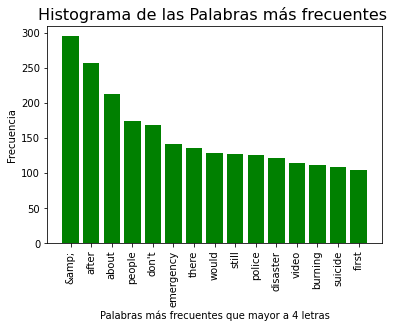

In [134]:
tweets = df_twitter.text.tolist()
tweets_token = []
for i in range(0,df_twitter.text.count()):
  tweet_split = tweets[i].split()
  tweets_token.append(tweet_split)  

tweets_token_list  = [token for sublist in tweets_token for token in sublist]
tweets_token_list = [x.lower() for x in tweets_token_list]


unique_words = {}
for tweet in tweets_token_list:
    if (tweet in unique_words.keys()):
          unique_words[tweet] += 1
    else:
          unique_words[tweet] = 1

sorted_tweet = OrderedDict(sorted(unique_words.items(), 
                                  key=lambda kv: kv[1], reverse=True))

list(sorted_tweet.items())[:15]

#Nos quedamos con los keys cuyo longitud es mayor a 4
unique_words_long4 ={}
for key, value in sorted_tweet.items():
  if len(key)>4:
    unique_words_long4[key] = value

#Primeros 15 resultados
top15 = dict(list(unique_words_long4.items())[0: 15])
plt.bar(top15.keys(), top15.values(), color='g')
plt.title("Histograma de las Palabras más frecuentes ", fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('Palabras más frecuentes que mayor a 4 letras')
plt.ylabel('Frecuencia')
plt.show()


In [0]:
#analizo las 3 variables, que contienen

location = df_twitter['location']


## Análisis por Ubicación 

In [136]:
type (location)

pandas.core.series.Series

In [137]:
location.value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
JKT48-Muse-A7X                    1
kansas                            1
staggering on tenement roofs      1
Calgary,AB, Canada                1
GLOBAL/WORLDWIDE                  1
Name: location, Length: 3341, dtype: int64

In [138]:
country= {'New York':'United States','USA':'United States','Los Angeles, CA':'United States', 'Washington, DC':'United States','Chicago, IL':'United States','California':'United States','California, USA':'United States','New York, NY':'United States','San Francisco':'United States', 'Florida':'United States', 'Washington, D.C.':'United States','Los Angeles':'United States','NYC':'United States','Seattle':'United States','San Francisco, CA':'United States','Chicago':'United States', 'Atlanta, GA':'United States', 'Sacramento, CA':'United States', 'Chicago Area':'United States', 'Los Angles, CA':'United States','Palm Beach County, FL':'United States','Texas':'United States','CA, AZ & NV':'United States', 'Colonial Heights, VA':'United States','New York City':'United States', 'Nashville, TN':'United States', 'US':'United States','San Diego,CA':'United States','Dallas, TX':'United States','Denver, Colorado':'United States','San Diego, CA':'United States','East TN':'United States', 'Houston, TX':'United States', 'Seattle, WA':'United States', 'Chapel Hill, NC':'United States','Austin,TX':'United States','Pennsylvania, USA':'United States', 'Denver, CO':'United States', 'Tennessee':'United States','Austin, TX':'United States','Memphis, TN':'United States','Orlando, FL':'United States','Paterson, New Jersey':'United States','Colorado':'United States','Massachusetts':'United States','Oklahoma City, OK':'United States','Charlotte, NC':'United States','Salt Lake City, Utah':'United States','Paterson, New Jersey':'United States','Portland, OR':'United States','Paterson, New Jersey ':'United Statess','Iliff,Colorado ':'United States','Brookly, NY': 'United States', 'United Statess':'United States','Atlanta':'United States', 'Brooklyn, NY':'United States', 'California, United States':'United States','NY':'United States','Wisconsin':'United States', 'San Jose, CA':'United States','New York, USA':'United States','Souther California':'United States','New Hampshire':'United States', 'Southern California':'United States','Florida, USA':'United States','Pennsylvania':'United States','Cleveland, OH':'United States','Indiana':'United States','Puerto Rico':'United States','Asheville,NC':'United States','Boston, MA':'United States','New Jersey':'United States','North Carolina':'United States','Tampa, FL':'United States','Texas, USA':'United States', 'North Carolina, USA':'United States', 'Midwest':'United States','Asheville, NC':'United States','Maryland':'United States', 'Atlanta Georgia ':'United States', 'San Francisco Bay Area':'United States','Oakland, CA':'United States','Oregon':'United States','Republic of Texas':'United States','Sacramento':'United States','Phoenix, AZ':'United States','Las Vegas, Nevada':'United States','Massachusetts, USA':'United States','U.S.A':'United States','Kansas City':'United States','Michigan':'United States','Portland, Oregon':'United States','Seattle, Washington':'United States','Philadelphia, PA':'United States','Bend, Oregon':'United States','Haddonfield, NJ':'United States','United Statess':'United States',
          'London':'United Kingdom','UK':'United Kingdom', 'Ireland':'United Kingdom','Londo, UK':'United Kingdom', 'London, England':'United Kingdom', 'Newport, Wales, UK':'United Kingdom','London, UK':'United Kingdom','Manchester':'United Kingdom', 'Scotland':'United Kingdom', 'Newcastle':'United Kingdom','Coventry':'United Kingdom','Leeds, England':'United Kingdom', 'Edinburgh':'United Kingdom','Paignton':'United Kingdom','Leicester':'United Kingdom','Birmingham':'United Kingdom','Manchester, England':'United Kingdom','london':'United Kingdom','uk':'United Kingdom',
          'Mumbai':'India', "Jakarta/Kuala Lumpur/S'pore":'India','Mumbai, Maharashtra':'India',
          'Toronto':'Canada','Canada ':'Canada','Calgary, Alberta':'Canada','Calgary':'Canada', 'Calgary, AB':'Canada','Vancouver, BC':'Canada','British Columbia, Canada':'Canada', 'canada':'Canada',
          'china':'China',
          'Santo Domingo Alma Rosa':'Dominica Republic',
          'Sydney':'Australia','Melbourne, Australia':'Australia','Melbourne':'Australia', 'Sydney, New South Wales':'Australia','Sydney, Australia':'Australia',
          'Morioh, Japan':'Japan','Tokyo':'Japan',
          'Brasil':'Brazil',
          'Cape Town':'South Africa',
          'Lagos':'Nigeria','Lagos, Nigeria':'Nigeria','Port Harcourt, Nigeria':'Nigeria',
          'Geneva':'Switzerland',
          'Nairobi':'Kenya','Nairobi-KENYA':'Kenya',
          'Worldwide': 'NaN','worldwide':'NaN','WorldWide':'NaN','Everywhere': 'NaN','Earth':'NaN', 'ss':'NaN','WonderlandÛÓ ?????? ???? ??????':'NaN','304':'NaN','World':'NaN', 'The Globe':'NaN', '#BlackLivesMatter':'NaN','IDN':'NaN', '??????':'NaN', ' Road to the Billionaires Club':'NaN','Global':'NaN','Planet Earth':'NaN','Pedophile hunting ground':'NaN','in the Word of God':'NaN', '?':'NaN','Happily Married with 2 kids ':'NaN','??':'NaN', '?????':'NaN','MAD as Hell':'NaN'     }
location = location.map(country, na_action='ignore').fillna('NaN')
print(location.value_counts())

NaN               6553
United States      747
United Kingdom     164
Canada              41
India               30
Australia           24
Nigeria             14
Japan               10
Kenya                7
United Statess       6
Brazil               5
Switzerland          4
South Africa         4
China                4
Name: location, dtype: int64


## Análisis por Longitud del Tweet

In [139]:
#dropeo location, y me fijo la longitud de caracteres de cada tweet

DF_drop_leng = df_twitter.drop(columns=['location'])
DF_drop_leng['leng_tweet'] = df_twitter['text'].str.len()
DF_drop_leng.head(20)

,id,keyword,text,target,leng_tweet
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,I'm afraid that the tornado is coming to our a...,1,52


Text(0, 0.5, 'Frecuencia')

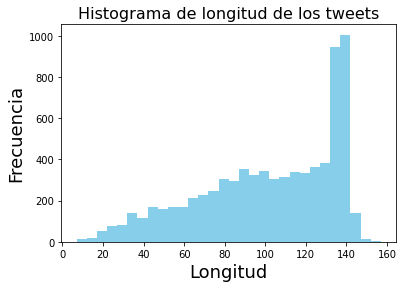

In [140]:
#######aca hice el histograma de longitud de los tweets, es distinto al de densidad


g = DF_drop_leng["leng_tweet"].plot.hist(bins=30, color='skyblue')
g.set_title("Histograma de longitud de los tweets", fontsize=16)
g.set_xlabel("Longitud",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [141]:
# analizo algunas variables estadisticas

gr_by_target = DF_drop_leng.groupby(['target']).agg({'leng_tweet': ['mean', 'count', 'max' , 'min']})
gr_by_target.head()

leng_tweet               
              mean count  max min
target                           
0        95.706817  4342  157   7
1       108.113421  3271  151  14

Text(0, 0.5, 'Length')

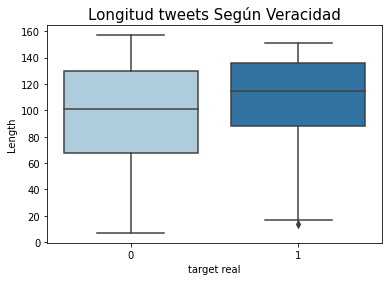

In [142]:


g = sns.boxplot(x="target", y="leng_tweet", data=DF_drop_leng, palette="Paired")
g.set_title("Longitud tweets Según Veracidad", fontsize=15)
g.set_xlabel("target real", fontsize=10)
g.set_ylabel("Length", fontsize=10)


In [143]:
# analizo algunas variables estadisticas

gr_by_target = key_top_39.groupby(['target']).agg({'leng_tweet': ['mean', 'count', 'max' , 'min']})
gr_by_target.head()

leng_tweet               
              mean count  max min
target                           
0        98.564341   645  148  17
1       110.044304   474  147  19

## Análisis por Keyword

In [144]:
key = df_twitter['keyword']
print(key.value_counts().sum()) # Cantidad de Tweets con keyword
print(key.value_counts()) # Cantidad de Categorías


7552
fatalities               45
armageddon               42
deluge                   42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


In [145]:
key_counts = DF_drop_leng['keyword'].value_counts()
key_counts[key_counts > key_counts.mean()]

fatalities             45
armageddon             42
deluge                 42
sinking                41
body%20bags            41
                       ..
flood                  35
hazardous              35
airplane%20accident    35
traumatised            35
inundated              35
Name: keyword, Length: 114, dtype: int64

Me quedo con los keywords con mas de 39 ocurrencias


In [0]:
key_top_39 = DF_drop_leng.groupby("keyword").filter(lambda x: len(x) >= 39)

In [147]:
print(key_top_39)

         id     keyword  ... target  leng_tweet
304     446  armageddon  ...      0          91
305     447  armageddon  ...      0          94
306     448  armageddon  ...      0         120
307     450  armageddon  ...      0          35
308     451  armageddon  ...      0          65
...     ...         ...  ...    ...         ...
7578  10830     wrecked  ...      0          48
7579  10831     wrecked  ...      0         107
7580  10832     wrecked  ...      0          93
7581  10833     wrecked  ...      0         104
7582  10834     wrecked  ...      0          80

[1119 rows x 5 columns]


Text(0.5, 1.0, 'Frecuencia de Keywords con mayor a 39 entradas')

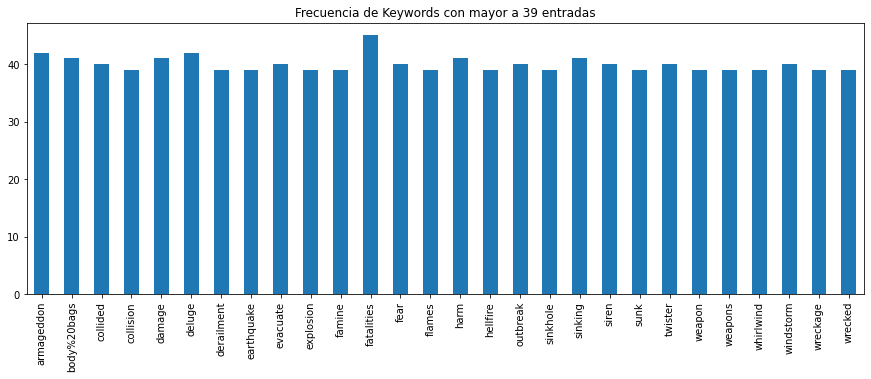

In [148]:
key_top_39['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.title('Frecuencia de Keywords con mayor a 39 entradas')


In [0]:
# analizo algunas variables estadisticas

gr_by_keyword1 = (key_top_39 [key_top_39['target'] == 0]).groupby(['keyword']).agg({'target': ['mean', 'count', 'max' , 'min']})
gr_by_keyword1= gr_by_keyword1.target #Eliminando el multi-index


In [150]:
gr_by_keyword2 = (key_top_39[key_top_39['target'] == 1]).groupby(['keyword']).agg({'target': [ 'count', 'max' , 'min']})
gr_by_keyword2= gr_by_keyword2.target #Eliminando el multi-index
gr_by_keyword2.head(10)


,count,max,min
keyword,,,
armageddon,5,1,1
body%20bags,1,1,1
collided,23,1,1
collision,29,1,1
damage,19,1,1
deluge,6,1,1
derailment,39,1,1
earthquake,30,1,1
evacuate,25,1,1


             fake  truth  total         %
armageddon   37.0      5   42.0  0.119048
body%20bags  40.0      1   41.0  0.024390
collided     17.0     23   40.0  0.575000
collision    10.0     29   39.0  0.743590
damage       22.0     19   41.0  0.463415
deluge       36.0      6   42.0  0.142857
earthquake    9.0     30   39.0  0.769231
evacuate     15.0     25   40.0  0.625000
explosion    19.0     20   39.0  0.512821
famine       13.0     26   39.0  0.666667
fatalities   19.0     26   45.0  0.577778
fear         35.0      5   40.0  0.125000
flames       26.0     13   39.0  0.333333
harm         37.0      4   41.0  0.097561
hellfire     32.0      7   39.0  0.179487
outbreak      1.0     39   40.0  0.975000
sinkhole     12.0     27   39.0  0.692308
sinking      33.0      8   41.0  0.195122
siren        35.0      5   40.0  0.125000
sunk         30.0      9   39.0  0.230769
twister      35.0      5   40.0  0.125000
weapon       25.0     14   39.0  0.358974
weapons      22.0     17   39.0  0

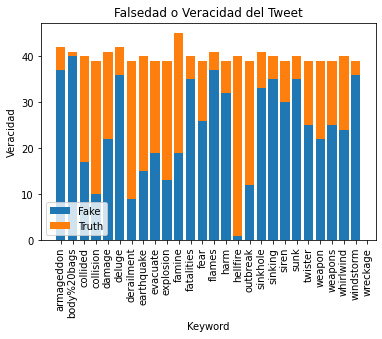

In [151]:
type(gr_by_keyword1['count'])
rate_of_truthfulnes = pd.concat([gr_by_keyword1['count'], gr_by_keyword2['count']], axis = 1, keys = ['fake','truth'])
rate_of_truthfulnes['total'] = rate_of_truthfulnes.fake+rate_of_truthfulnes.truth
rate_of_truthfulnes['%'] = rate_of_truthfulnes.truth/rate_of_truthfulnes.total

print(rate_of_truthfulnes)

labels = key_top_39['keyword'].drop_duplicates()
fake = rate_of_truthfulnes.fake
truth = rate_of_truthfulnes.truth

fig, ax = plt.subplots()


ax.bar(labels, fake, label='Fake')
ax.bar(labels, truth, label='Truth',bottom=fake)
plt.xticks(rotation='vertical')
xlocs, xlabs = plt.xticks()

ax.set_ylabel('Veracidad')
ax.set_xlabel('Keyword')
ax.set_title('Falsedad o Veracidad del Tweet')
ax.legend()





#Más mencionados según veracidad

In [0]:
df_twitter['target'].fillna(0)
sText = df_twitter['text']
sTarget = df_twitter['target']

#Busco todas las menciones de los usuarios
exp = '@[_a-zA-Z]{2,16}'
mention_on_real_tw = {}
j=0;
for i in range(len(sText)):
    if(len(re.findall(exp,sText[i]))>1 and sTarget[i]==1):
        mention_on_real_tw[j] = re.findall(exp,sText[i])
        j+=1

arrobed_real = {}
k= 0
for i in range(len(mention_on_real_tw)):
    for j in range(len(mention_on_real_tw[i])):
        arrobed_real[k] = mention_on_real_tw[i][j]
        k+=1

        
        
mention_on_fake_tw  ={}
j=0;
for i in range(len(sText)):
    if(len(re.findall(exp,sText[i]))>1 and sTarget[i]==0):
        mention_on_fake_tw[j] = re.findall(exp,sText[i])
        j+=1
        
arrobed_fake = {}
k= 0
for i in range(len(mention_on_fake_tw)):
    for j in range(len(mention_on_fake_tw[i])):
        arrobed_fake[k] = mention_on_fake_tw[i][j]
        k+=1
        
        
pdReal = pd.DataFrame.from_dict(arrobed_real, orient='index', columns=['mentionReal',])
pdFake = pd.DataFrame.from_dict(arrobed_fake, orient='index', columns=['mentionFake',])

Text(0.5, 1.0, 'Usuarios Mencionados Ante Tweets Veraces')

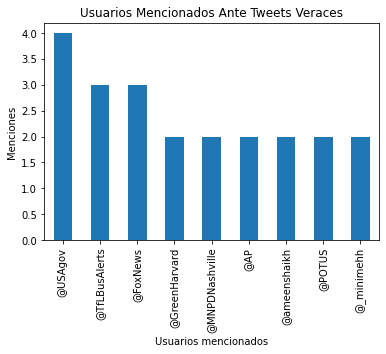

In [153]:
ax = pdReal['mentionReal'].value_counts().iloc[:9].plot(kind='bar')
ax.set_ylabel('Menciones')
ax.set_xlabel('Usuarios mencionados')
ax.set_title('Usuarios Mencionados Ante Tweets Veraces')


Text(0.5, 0, 'Usuarios mencionados')

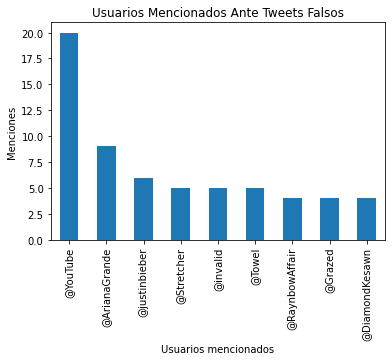

In [154]:
ax = pdFake['mentionFake'].value_counts().iloc[:9].plot(kind='bar')
ax.set_title('Usuarios Mencionados Ante Tweets Falsos')
ax.set_ylabel('Menciones')
ax.set_xlabel('Usuarios mencionados')


Análisis Heatmap

Text(0.5, 1.0, 'Heatmap - Longitud del Tweet y Veracidad')

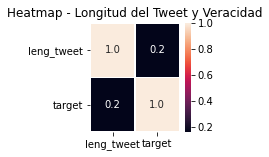

In [162]:

my_base = pd.concat([DF_drop_leng['leng_tweet'], sTarget], axis=1, join='inner')
correlation_matrix = my_base.corr(method='spearman')
correlation_matrix
figure_size = (2, 2)
fig, ax = plt.subplots(figsize=figure_size)

sns.heatmap(correlation_matrix, xticklabels=list(correlation_matrix), yticklabels=list(correlation_matrix),
            annot=True, fmt='.1f', linewidths = 0.5, ax=ax).set_title("Heatmap - Longitud del Tweet y Veracidad")
